In [2]:
# Import Numpy for calculations and matplotlib for charting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
file1 = "raw_data/clinicaltrial_data.csv"
file2 = "raw_data/mouse_drug_data.csv"

In [4]:
tumor_df = pd.read_csv(file1)
tumor_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0

In [5]:
drug_df = pd.read_csv(file2)
drug_df.head()

Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn

In [6]:
# May need to merge dataframes on mouse ID
# Using an inner join here
merge_table = pd.merge(tumor_df, drug_df, on=["Mouse ID"])
merge_table

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites       Drug
0        b128          0           45.000000                 0  Capomulin
1        b128          5           45.651331                 0  Capomulin
2        b128         10           43.270852                 0  Capomulin
3        b128         15           43.784893                 0  Capomulin
4        b128         20           42.731552                 0  Capomulin
5        b128         25           43.262145                 1  Capomulin
6        b128         30           40.605335                 1  Capomulin
7        b128         35           37.967644                 1  Capomulin
8        b128         40           38.379726                 2  Capomulin
9        b128         45           38.982878                 2  Capomulin
10       f932          0           45.000000                 0   Ketapril
11       g107          0           45.000000                 0   Ketapril
12       g107          5           48.791665                 0   Ketapril
13       g107         10           53.435987                 0   Ketapril
14       g107         15           58.135545                 0   Ketapril
15       g107         20           62.706031                 0   Ketapril
16       g107         25           64.663626                 0   Ketapril
17       g107         30           69.160520                 0   Ketapril
18       g107         35           71.905117                 0   Ketapril
19       a457          0           45.000000                 0   Ketapril
20       a457          5           47.462891                 0   Ketapril
21       a457         10           49.783419                 0   Ketapril
22       c819          0           45.000000                 0   Ketapril
23       c819          5           45.769249                 1   Ketapril
24       c819         10           46.658395                 1   Ketapril
25       c819         15           48.370999                 1   Ketapril
26       c819         20           49.762415                 1   Ketapril
27       c819         25           51.828357                 1   Ketapril
28       c819         30           56.098998                 1   Ketapril
29       c819         35           57.729535                 1   Ketapril
...       ...        ...                 ...               ...        ...
1876     i557         25           44.596219                 0  Capomulin
1877     i557         30           45.261384                 0  Capomulin
1878     i557         35           45.941949                 0  Capomulin
1879     i557         40           46.821070                 1  Capomulin
1880     i557         45           47.685963                 1  Capomulin
1881     m957          0           45.000000                 0  Capomulin
1882     m957          5           45.622381                 1  Capomulin
1883     m957         10           46.414518                 1  Capomulin
1884     m957         15           39.804453                 1  Capomulin
1885     m957         20           38.909349                 1  Capomulin
1886     m957         25           37.695432                 1  Capomulin
1887     m957         30           38.212479                 1  Capomulin
1888     m957         35           32.562839                 1  Capomulin
1889     m957         40           32.947615                 1  Capomulin
1890     m957         45           33.329098                 1  Capomulin
1891     f966          0           45.000000                 0  Capomulin
1892     f966          5           38.796474                 0  Capomulin
1893     f966         10           35.624403                 0  Capomulin
1894     f966         15           32.623003                 0  Capomulin
1895     f966         20           30.485985                 0  Capomulin
1896     m601          0           45.000000                 0  Capomulin
1897     m601          5           41.408591                 1  Capomulin
1898     

In [7]:
#Find all types of drug used
Counter(merge_table["Drug"])
Counter(merge_table["Metastatic Sites"])

Counter({0: 800, 1: 595, 2: 275, 3: 148, 4: 88})

In [8]:
# Create a scatter plot that shows how the tumor volume changes over time for each treatment
# I will need drug_df to differentiate the treatments in the data
x_axis = np.arange(len(tumor_df)) # what do I need this for?

In [9]:
# Merge table divided by drug type

drug_timepoint_group = merge_table.groupby(['Drug','Timepoint'])
# print(drug_timepoint_group.head())
dtg_mean = drug_timepoint_group.mean().reset_index()
# print(dtg_mean)
dtg_sem = drug_timepoint_group.sem().reset_index()
# print(dtg_sem)
# I will plot the +- values here onto my scatterplot, there is a parameter that adds the -'s in 
# plt.errorbar

# The average value of Tumor Volume (mm3) and Metastatic Sites on each timepoint divided by drug type
capomulin1 = dtg_mean.loc[dtg_mean["Drug"] == "Capomulin",:]
ceftamin1 = dtg_mean.loc[dtg_mean["Drug"] == "Ceftamin",:]
infubinol1 = dtg_mean.loc[dtg_mean["Drug"] == "Infubinol",:]
ketapril1 = dtg_mean.loc[dtg_mean["Drug"] == "Ketapril",:]
naftisol1 = dtg_mean.loc[dtg_mean["Drug"] == "Naftisol",:]
placebo1 = dtg_mean.loc[dtg_mean["Drug"] == "Placebo",:]
propriva1 = dtg_mean.loc[dtg_mean["Drug"] == "Propriva",:]
ramicane1 = dtg_mean.loc[dtg_mean["Drug"] == "Ramicane",:]
stelasyn1 = dtg_mean.loc[dtg_mean["Drug"] == "Stelasyn",:]
zoniferol1 = dtg_mean.loc[dtg_mean["Drug"] == "Zoniferol",:]
# print(capomulin1)

# Standard Error of the Mean for Tumor Volume (mm3) and Metastatic Sites
cap_error = dtg_sem.loc[dtg_sem["Drug"] == "Capomulin",:]
ceft_error = dtg_sem.loc[dtg_sem["Drug"] == "Ceftamin",:]
inf_error = dtg_sem.loc[dtg_sem["Drug"] == "Infubinol",:]
ket_error = dtg_sem.loc[dtg_sem["Drug"] == "Ketapril",:]
naft_error = dtg_sem.loc[dtg_sem["Drug"] == "Naftisol",:]
pla_error = dtg_sem.loc[dtg_sem["Drug"] == "Placebo",:]
pro_error = dtg_sem.loc[dtg_sem["Drug"] == "Propriva",:]
ram_error = dtg_sem.loc[dtg_sem["Drug"] == "Ramicane",:]
stela_error = dtg_sem.loc[dtg_sem["Drug"] == "Stelasyn",:]
zon_error = dtg_sem.loc[dtg_sem["Drug"] == "Zoniferol",:]
# print(cap_err_tumor)

tumor_volume_mean = pd.DataFrame(dtg_mean)
# tumor_volume_mean

# No need to convert to DataFrame to index using .iloc
# capomulin1_df = pd.DataFrame(capomulin1)
# capomulin1_df
# capomulin1_df["Tumor Volume (mm3)"].iloc(0)

# The average value of Metastatic Sites on each timepoint divided by drug type
# capomulin2 = merge_table.loc[merge_table["Drug"] == "Capomulin",:]
# ceftamin2 = merge_table.loc[merge_table["Drug"] == "Ceftamin",:]
# infubinol2 = merge_table.loc[merge_table["Drug"] == "Infubinol",:]
# ketapril2 = merge_table.loc[merge_table["Drug"] == "Ketapril",:]
# naftisol2 = merge_table.loc[merge_table["Drug"] == "Naftisol",:]
# placebo2 = merge_table.loc[merge_table["Drug"] == "Placebo",:]
# propriva2 = merge_table.loc[merge_table["Drug"] == "Propriva",:]
# ramicane2 = merge_table.loc[merge_table["Drug"] == "Ramicane",:]
# stelasyn2 = merge_table.loc[merge_table["Drug"] == "Stelasyn",:]
# zoniferol2 = merge_table.loc[merge_table["Drug"] == "Zoniferol",:]

# Groupby's



# I will use groupby's insteaad of .loc statements
# groupby(Drug, Timepoint), then get mean() of that groupby
# look into groupby method sem or standard error of the mean

In [10]:
# Grab first and last Tumor Volume value
# capomulin1["Tumor Volume (mm3)"].iloc[0]
# capomulin1["Tumor Volume (mm3)"].iloc[-1]

# No need for error bars on bar graph, so these are not needed
# cap_error["Tumor Volume (mm3)"].iloc[0]
# cap_error["Tumor Volume (mm3)"].iloc[-1]

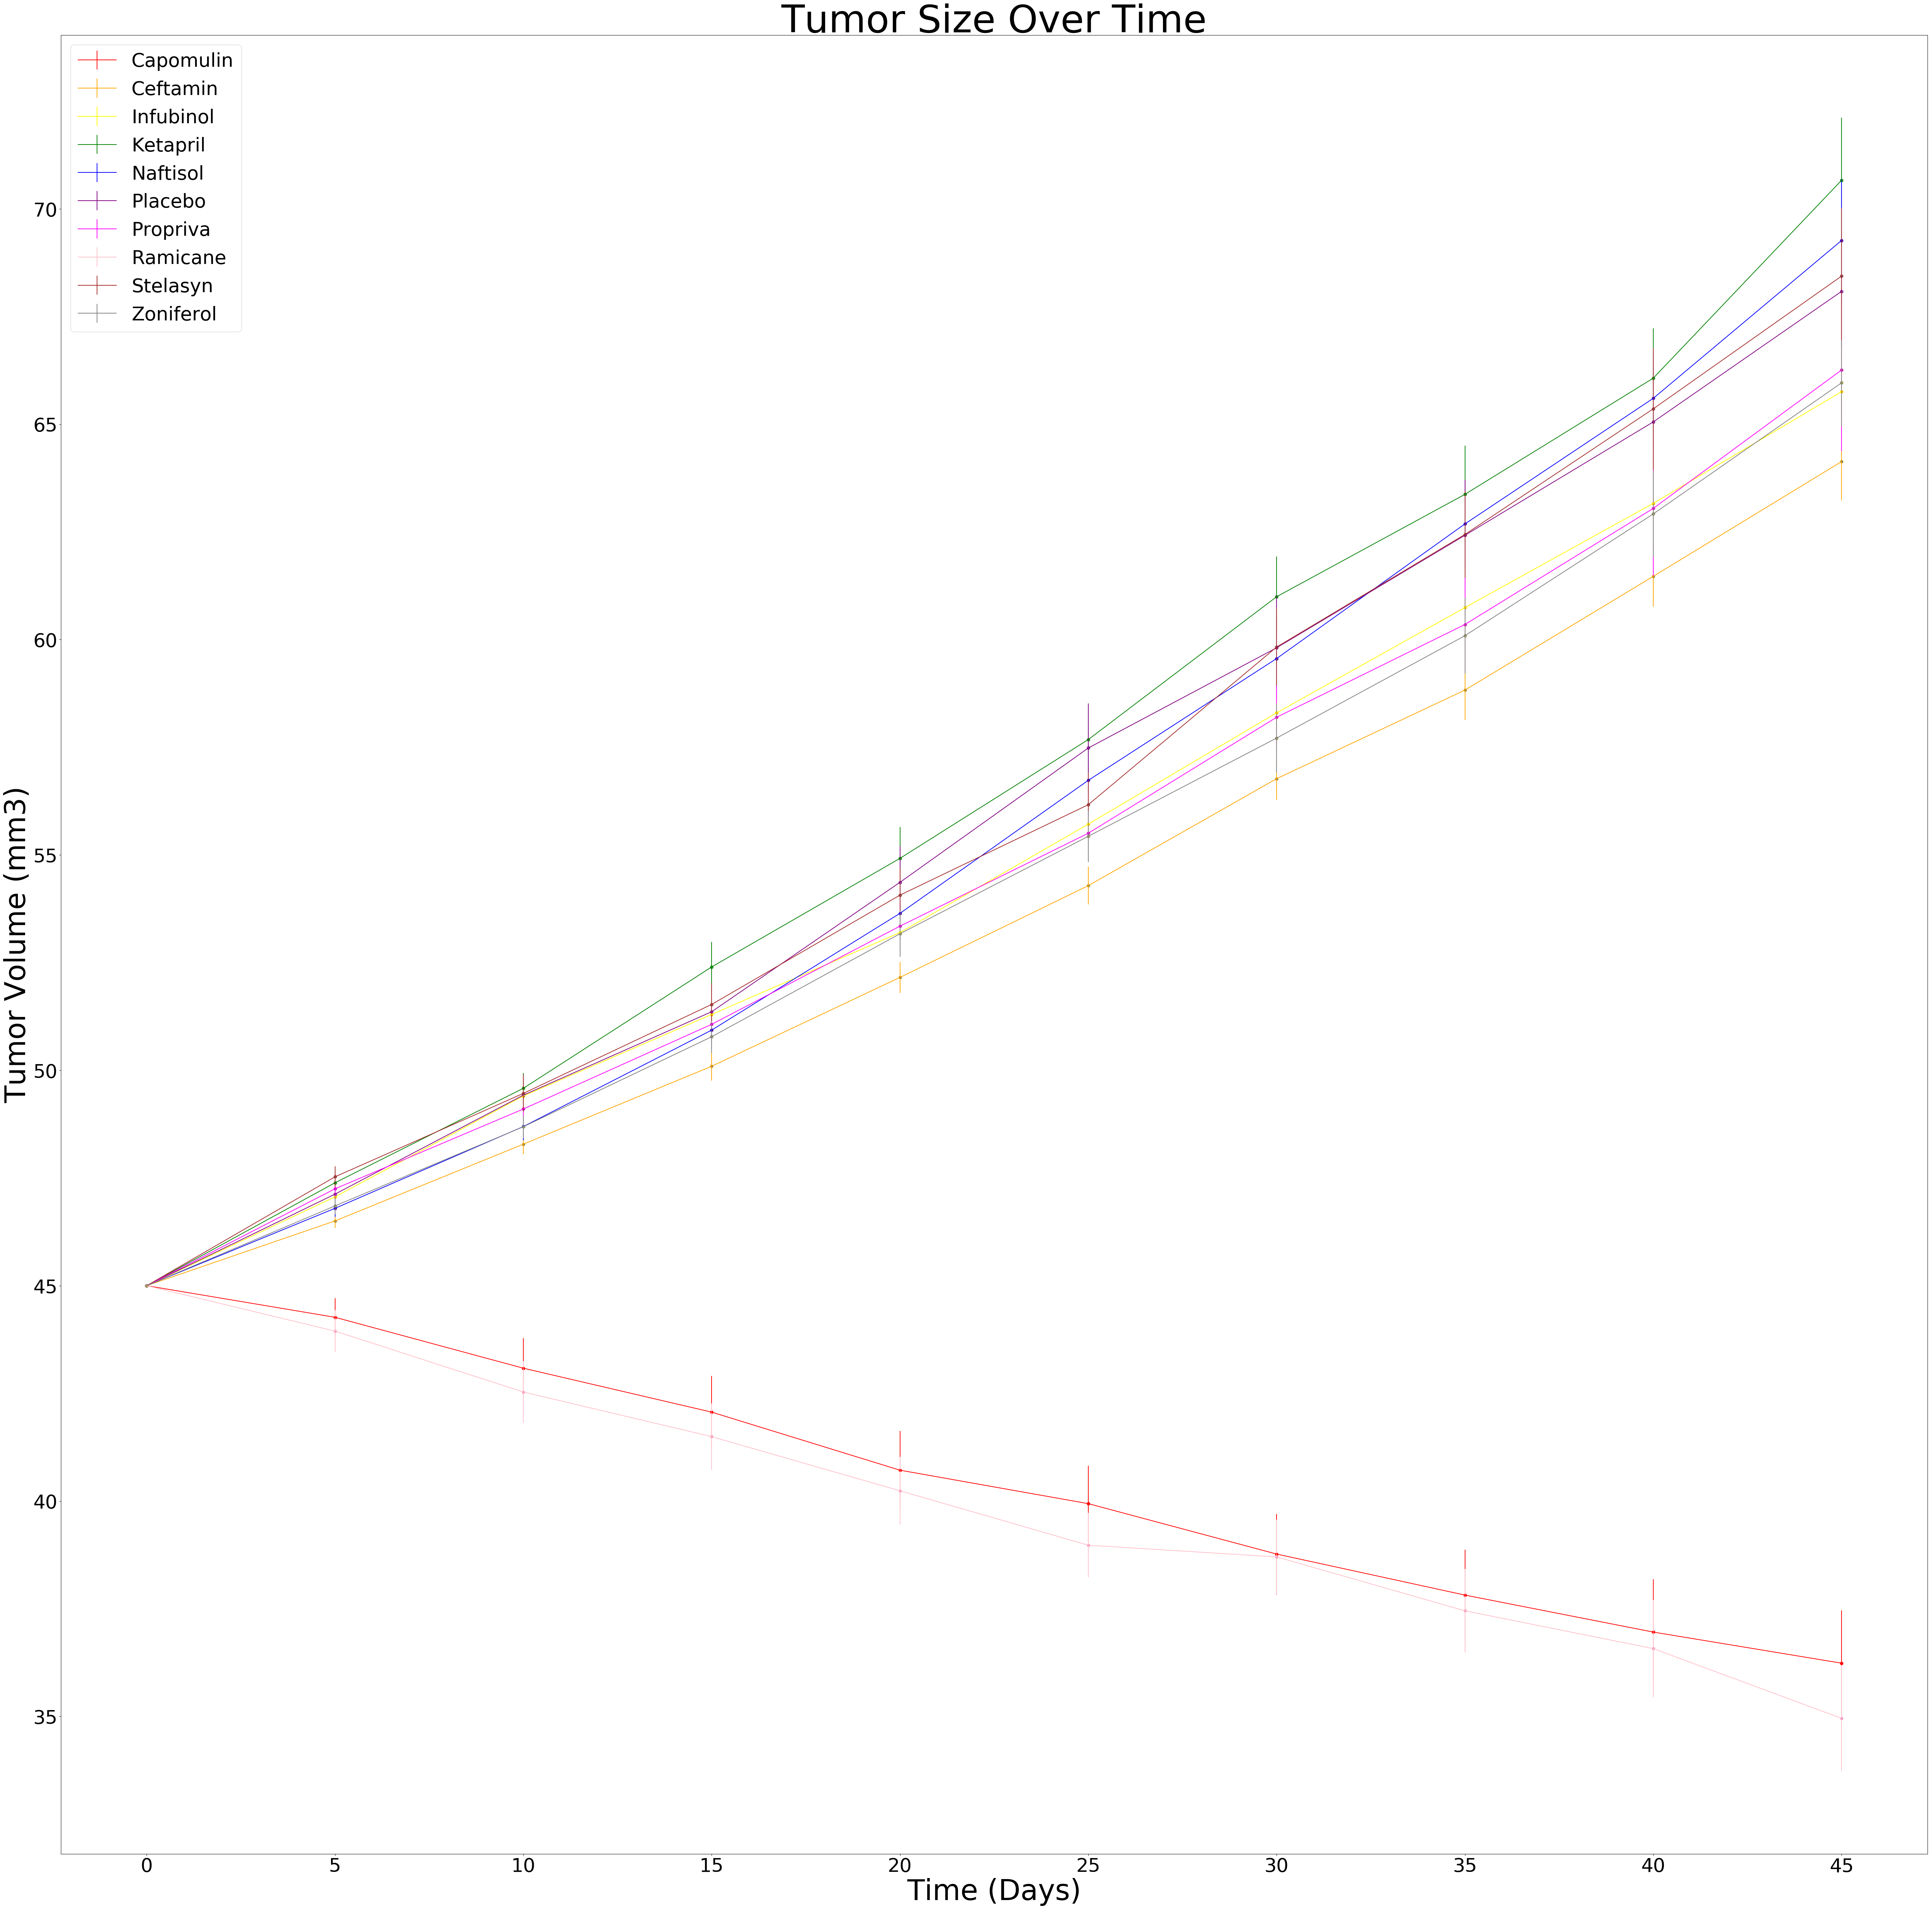

In [11]:
# Tumor Volume Change Over Time By Treatment

plt.figure(1,figsize=(70,70), dpi = 100)

plt.scatter(capomulin1["Timepoint"], capomulin1["Tumor Volume (mm3)"], 
           c = "red", label="")
plt.errorbar(cap_error["Timepoint"],capomulin1["Tumor Volume (mm3)"], yerr = cap_error["Tumor Volume (mm3)"],
             color="red", label='Capomulin')
plt.scatter(ceftamin1["Timepoint"], ceftamin1["Tumor Volume (mm3)"], 
           edgecolors = "orange", label="")
plt.errorbar(ceft_error["Timepoint"],ceftamin1["Tumor Volume (mm3)"], yerr = ceft_error["Tumor Volume (mm3)"],
             color="orange", label='Ceftamin')
plt.scatter(infubinol1["Timepoint"], infubinol1["Tumor Volume (mm3)"], 
           edgecolors = "yellow", label="")
plt.errorbar(inf_error["Timepoint"],infubinol1["Tumor Volume (mm3)"], yerr = inf_error["Tumor Volume (mm3)"],
             color="yellow", label='Infubinol')
plt.scatter(ketapril1["Timepoint"], ketapril1["Tumor Volume (mm3)"], 
           edgecolors = "green", label="")
plt.errorbar(ket_error["Timepoint"],ketapril1["Tumor Volume (mm3)"], yerr = ket_error["Tumor Volume (mm3)"],
             color="green", label='Ketapril')
plt.scatter(naftisol1["Timepoint"], naftisol1["Tumor Volume (mm3)"], 
           edgecolors = "blue", label = "")
plt.errorbar(naft_error["Timepoint"],naftisol1["Tumor Volume (mm3)"], yerr = naft_error["Tumor Volume (mm3)"],
             color="blue", label='Naftisol')
plt.scatter(placebo1["Timepoint"], placebo1["Tumor Volume (mm3)"], 
           edgecolors = "purple", label = "")
plt.errorbar(pla_error["Timepoint"],placebo1["Tumor Volume (mm3)"], yerr = pla_error["Tumor Volume (mm3)"],
             color="purple", label='Placebo')
plt.scatter(propriva1["Timepoint"], propriva1["Tumor Volume (mm3)"], 
           edgecolors = "magenta", label="")
plt.errorbar(pro_error["Timepoint"],propriva1["Tumor Volume (mm3)"], yerr = pro_error["Tumor Volume (mm3)"],
             color="magenta", label='Propriva')
plt.scatter(ramicane1["Timepoint"], ramicane1["Tumor Volume (mm3)"], 
           edgecolors = "pink", label="")
plt.errorbar(ram_error["Timepoint"],ramicane1["Tumor Volume (mm3)"], yerr = ram_error["Tumor Volume (mm3)"],
             color="pink", label='Ramicane')
plt.scatter(stelasyn1["Timepoint"], stelasyn1["Tumor Volume (mm3)"], 
           edgecolors = "brown", label="")
plt.errorbar(stela_error["Timepoint"],stelasyn1["Tumor Volume (mm3)"], yerr = stela_error["Tumor Volume (mm3)"],
             color="brown", label='Stelasyn')
plt.scatter(zoniferol1["Timepoint"], zoniferol1["Tumor Volume (mm3)"], 
           edgecolors = "grey", label="")
plt.errorbar(zon_error["Timepoint"],zoniferol1["Tumor Volume (mm3)"], yerr = zon_error["Tumor Volume (mm3)"],
             color="grey", label='Zoniferol')

# plt.scatter(dtg_mean["Timepoint"], dtg_mean["Tumor Volume (mm3)"])

plt.legend(loc="best", prop={'size': 40})
plt.title("Tumor Size Over Time", size=80)
plt.xlabel("Time (Days)", size=60)
plt.ylabel("Tumor Volume (mm3)", size=60)
plt.xticks(np.arange(50, step=5), size=40)
plt.yticks(size=40)


# see milespergallon exercise for how to adjust figsize
plt.savefig("Tumor_Size_Over_Time.png")
plt.show()


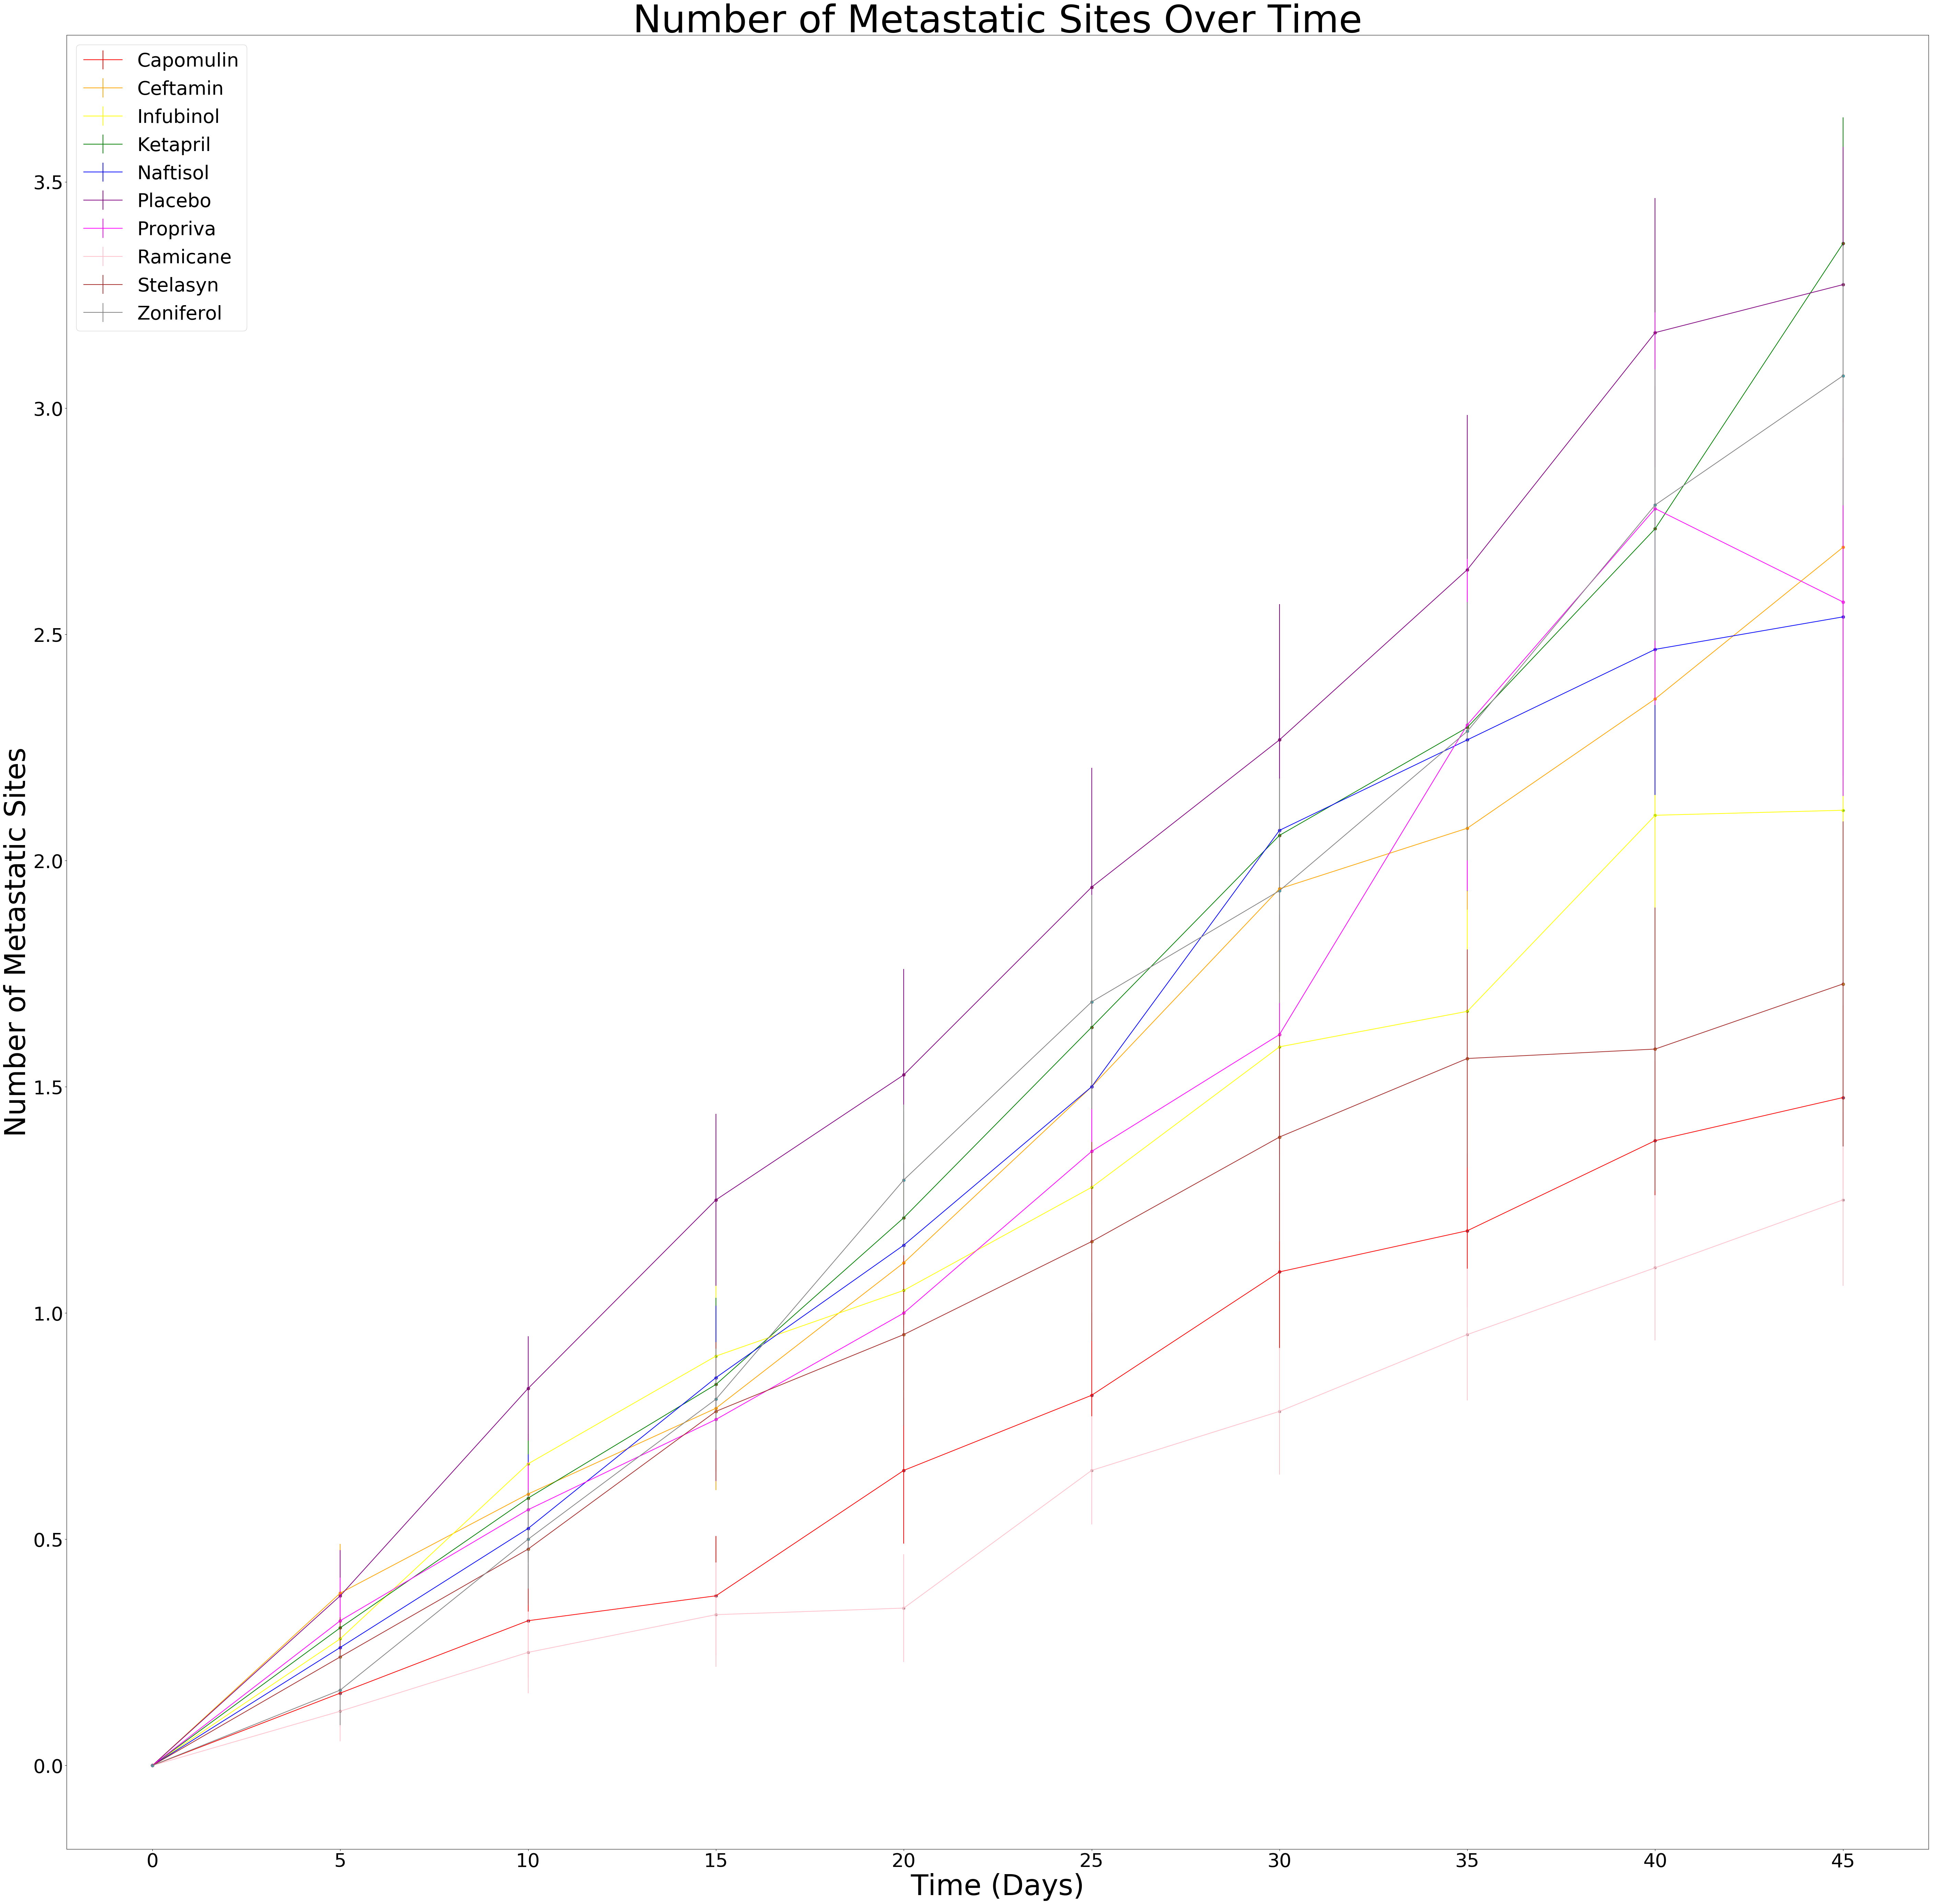

In [12]:
# Metastatic Site Changes Over Time by Treatment
# this graph has a ton of overlapping values since metastatic sites are only whole numbers 0-4
# graphs each mouse's number of metastatic sites (up to 250 data points per timepoint)

plt.figure(2,figsize=(70,70), dpi = 100)

plt.scatter(capomulin1["Timepoint"], capomulin1["Metastatic Sites"], 
           edgecolors = "red", label="")
plt.errorbar(cap_error["Timepoint"],capomulin1["Metastatic Sites"], yerr = cap_error["Metastatic Sites"],
             color="red", label='Capomulin')
plt.scatter(ceftamin1["Timepoint"], ceftamin1["Metastatic Sites"], 
           edgecolors = "orange", label="")
plt.errorbar(ceft_error["Timepoint"],ceftamin1["Metastatic Sites"], yerr = ceft_error["Metastatic Sites"],
             color="orange", label='Ceftamin')
plt.scatter(infubinol1["Timepoint"], infubinol1["Metastatic Sites"], 
           edgecolors = "yellow", label="")
plt.errorbar(inf_error["Timepoint"],infubinol1["Metastatic Sites"], yerr = inf_error["Metastatic Sites"],
             color="yellow", label='Infubinol')
plt.scatter(ketapril1["Timepoint"], ketapril1["Metastatic Sites"], 
           edgecolors = "green", label="")
plt.errorbar(ket_error["Timepoint"],ketapril1["Metastatic Sites"], yerr = ket_error["Metastatic Sites"],
             color="green", label='Ketapril')
plt.scatter(naftisol1["Timepoint"], naftisol1["Metastatic Sites"], 
           edgecolors = "blue", label = "")
plt.errorbar(naft_error["Timepoint"],naftisol1["Metastatic Sites"], yerr = naft_error["Metastatic Sites"],
             color="blue", label='Naftisol')
plt.scatter(placebo1["Timepoint"], placebo1["Metastatic Sites"], 
           edgecolors = "purple", label = "")
plt.errorbar(pla_error["Timepoint"],placebo1["Metastatic Sites"], yerr = pla_error["Metastatic Sites"],
             color="purple", label='Placebo')
plt.scatter(propriva1["Timepoint"], propriva1["Metastatic Sites"], 
           edgecolors = "magenta", label="")
plt.errorbar(pro_error["Timepoint"],propriva1["Metastatic Sites"], yerr = pro_error["Metastatic Sites"],
             color="magenta", label='Propriva')
plt.scatter(ramicane1["Timepoint"], ramicane1["Metastatic Sites"], 
           edgecolors = "pink", label="")
plt.errorbar(ram_error["Timepoint"],ramicane1["Metastatic Sites"], yerr = ram_error["Metastatic Sites"],
             color="pink", label='Ramicane')
plt.scatter(stelasyn1["Timepoint"], stelasyn1["Metastatic Sites"], 
           edgecolors = "brown", label="")
plt.errorbar(stela_error["Timepoint"],stelasyn1["Metastatic Sites"], yerr = stela_error["Metastatic Sites"],
             color="brown", label='Stelasyn')
plt.scatter(zoniferol1["Timepoint"], zoniferol1["Metastatic Sites"], 
           edgecolors = "grey", label="")
plt.errorbar(zon_error["Timepoint"],zoniferol1["Metastatic Sites"], yerr = zon_error["Metastatic Sites"],
             color="grey", label='Zoniferol')

plt.legend(loc="best", prop={'size': 40})
plt.title("Number of Metastatic Sites Over Time", size=80)
plt.xlabel("Time (Days)", size=60)
plt.ylabel("Number of Metastatic Sites", size=60)
plt.xticks(np.arange(50, step=5), size=40)
plt.yticks(size=40)


# see milespergallon exercise for how to adjust figsize
plt.savefig("Metastatic_Sites_Over_Time.png")
plt.show()

In [13]:
# Number of Mice Alive Through the Course of Treatment
# Counter(merge_table["Mouse ID"])
# len(Counter(merge_table["Mouse ID"]))

In [14]:
# DataFrame of Number of Mice Alive
mouse_count_group = merge_table.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]
mouse_count_df = pd.DataFrame(mouse_count_group)
mouse_count_df = mouse_count_df.rename(columns={"Mouse ID":"Mouse Count"})
# Reset the index so I can access Drug and Timepoint columns with .loc
mc_df = mouse_count_df.reset_index()
# mouse_count_df

# to get the first day and last day number of mice per drug:
# day1_capomulin = mc_df.loc[(mc_df["Drug"]=="Capomulin") & (mc_df["Timepoint"]==0),:]
# day1_capomulin

In [15]:
# mouse_count_df divided by drug type

capomulin2 = mc_df.loc[mc_df["Drug"] == "Capomulin",:]
ceftamin2 = mc_df.loc[mc_df["Drug"] == "Ceftamin",:]
infubinol2 = mc_df.loc[mc_df["Drug"] == "Infubinol",:]
ketapril2 = mc_df.loc[mc_df["Drug"] == "Ketapril",:]
naftisol2 = mc_df.loc[mc_df["Drug"] == "Naftisol",:]
placebo2 = mc_df.loc[mc_df["Drug"] == "Placebo",:]
propriva2 = mc_df.loc[mc_df["Drug"] == "Propriva",:]
ramicane2 = mc_df.loc[mc_df["Drug"] == "Ramicane",:]
stelasyn2 = mc_df.loc[mc_df["Drug"] == "Stelasyn",:]
zoniferol2 = mc_df.loc[mc_df["Drug"] == "Zoniferol",:]

# Do I do groupby's here too?
# I will need sem here?

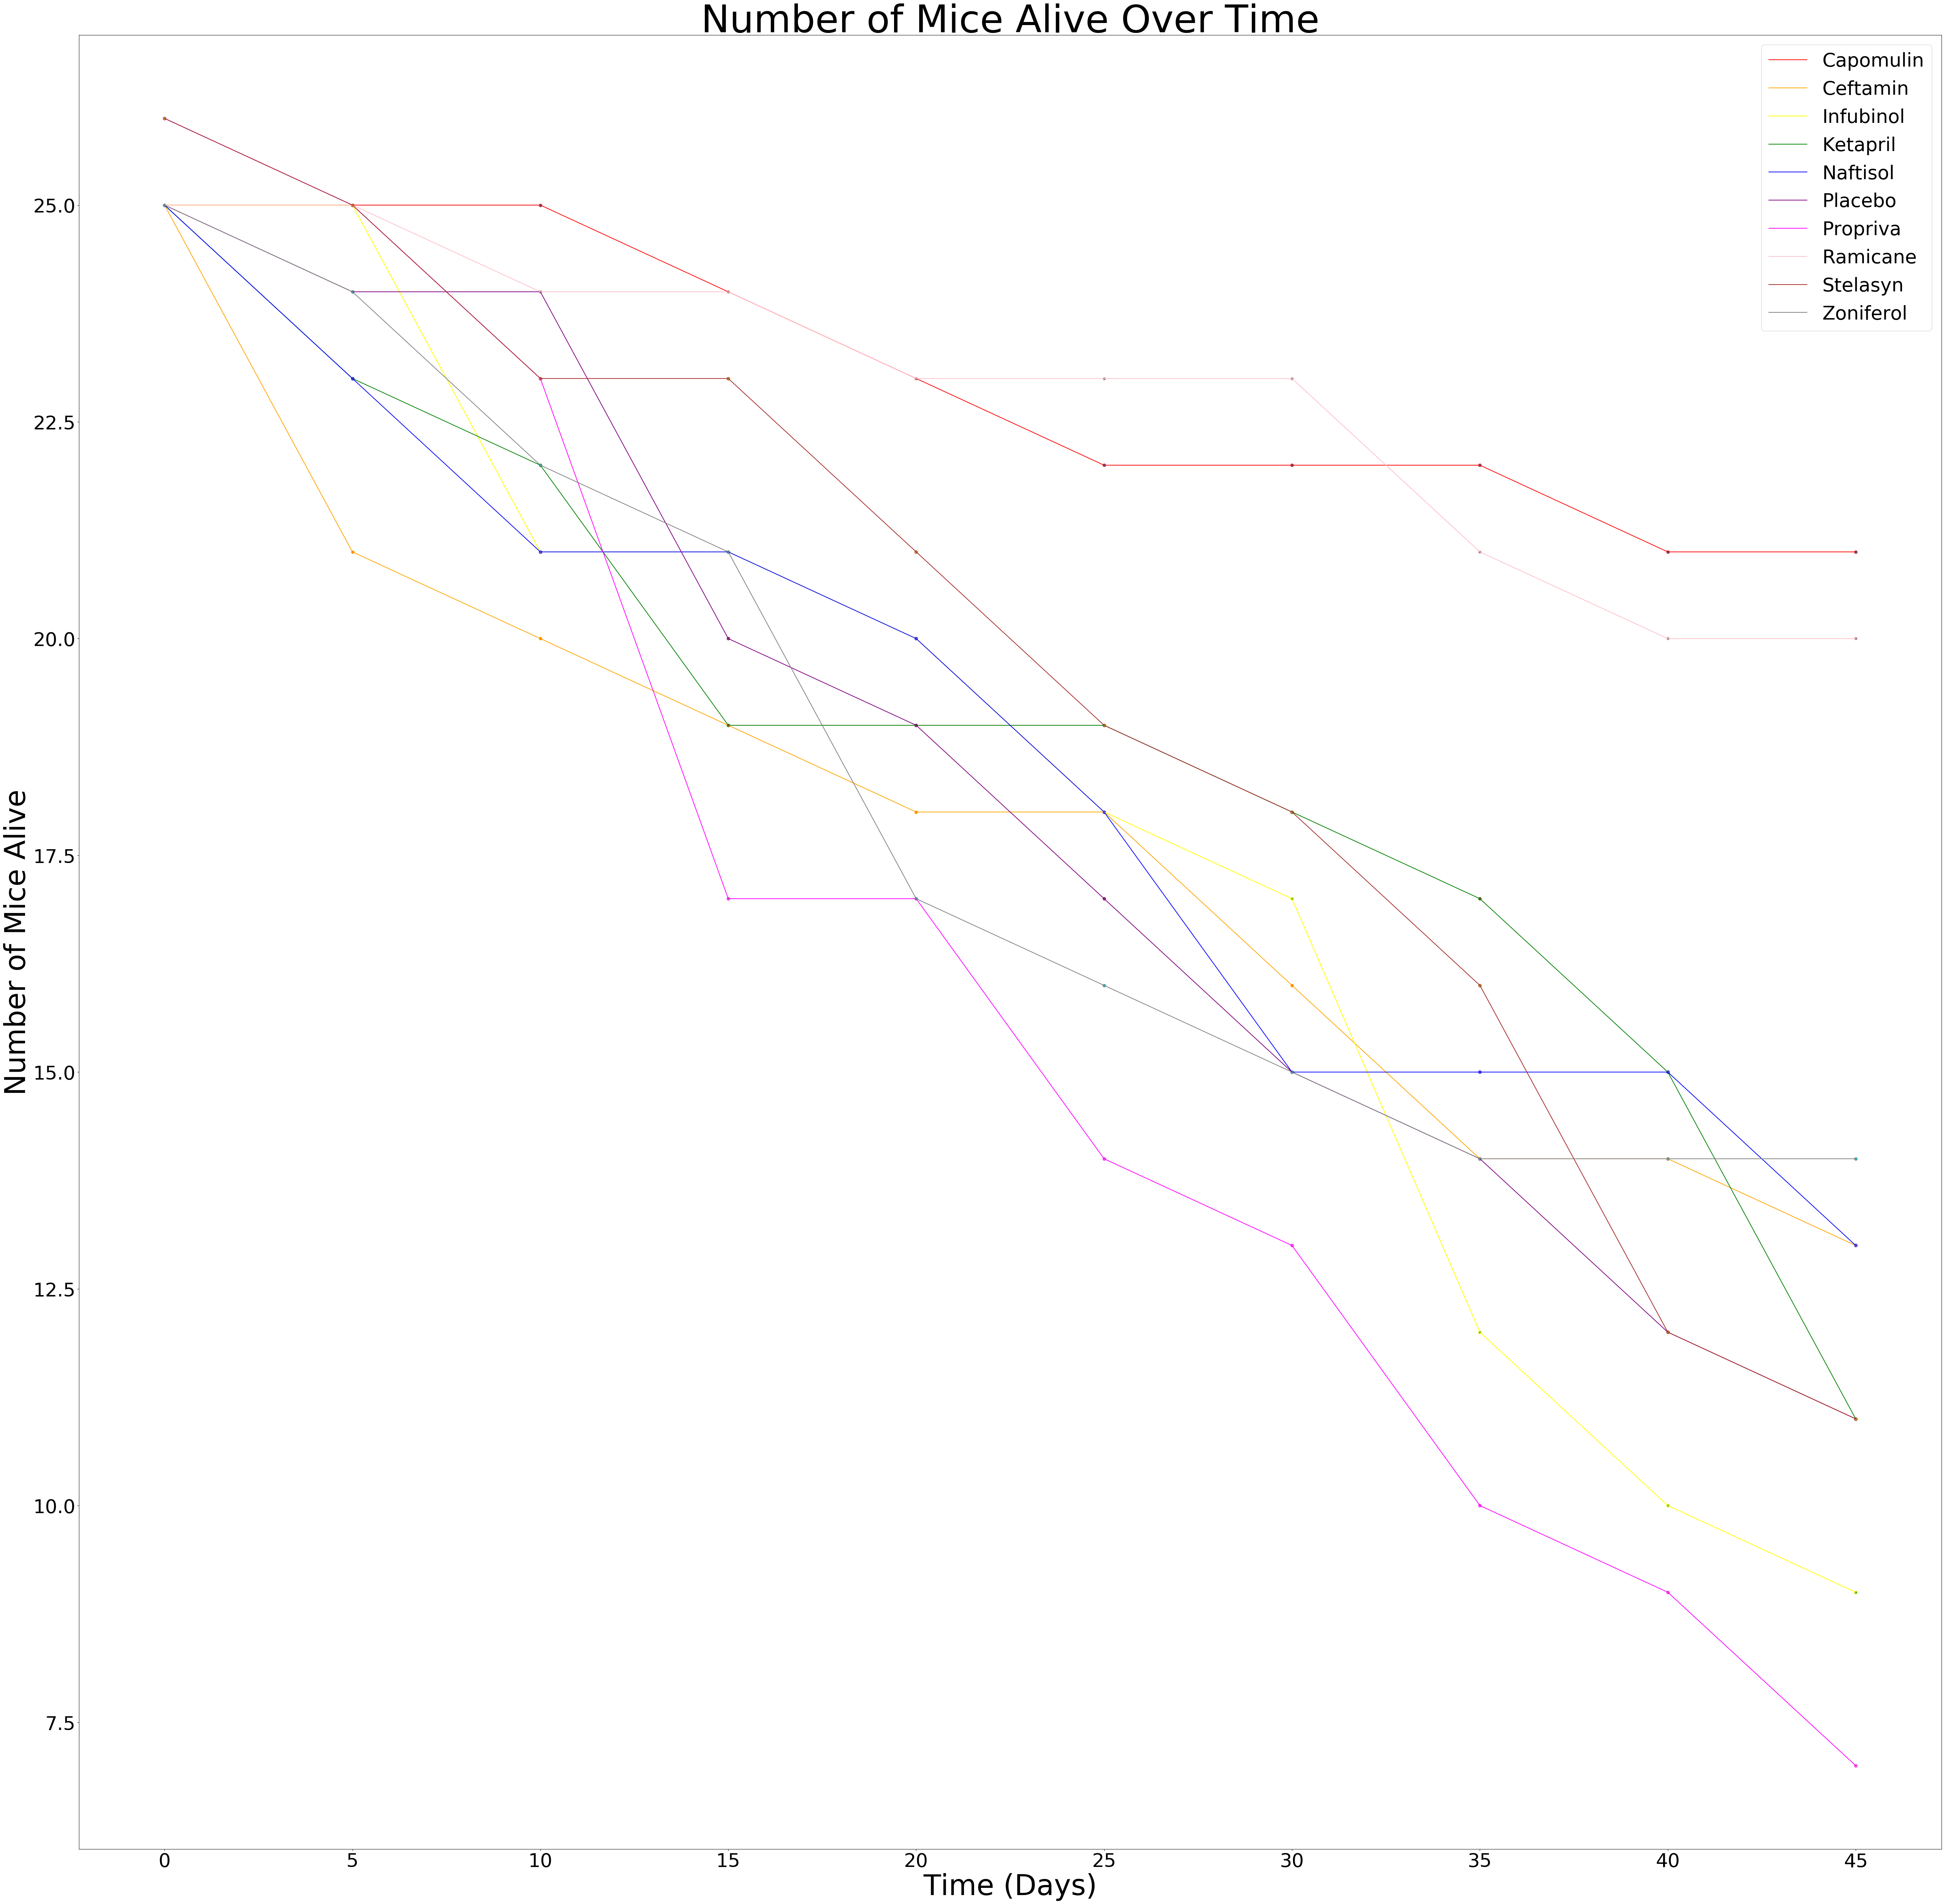

In [16]:
plt.figure(3,figsize=(70,70), dpi = 100)

plt.scatter(capomulin2["Timepoint"], capomulin2["Mouse Count"], 
           edgecolors = "red", label="")
plt.plot(capomulin2["Timepoint"], capomulin2["Mouse Count"], 
           c = "red", label="Capomulin")
plt.scatter(ceftamin2["Timepoint"], ceftamin2["Mouse Count"], 
           edgecolors = "orange", label="")
plt.plot(ceftamin2["Timepoint"], ceftamin2["Mouse Count"], 
           c = "orange", label="Ceftamin")
plt.scatter(infubinol2["Timepoint"], infubinol2["Mouse Count"], 
           edgecolors = "yellow", label="")
plt.plot(infubinol2["Timepoint"], infubinol2["Mouse Count"], 
           c = "yellow", label="Infubinol")
plt.scatter(ketapril2["Timepoint"], ketapril2["Mouse Count"], 
           edgecolors = "green", label="")
plt.plot(ketapril2["Timepoint"], ketapril2["Mouse Count"], 
           c = "green", label="Ketapril")
plt.scatter(naftisol2["Timepoint"], naftisol2["Mouse Count"], 
           edgecolors = "blue", label = "")
plt.plot(naftisol2["Timepoint"], naftisol2["Mouse Count"], 
           c = "blue", label = "Naftisol")
plt.scatter(placebo2["Timepoint"], placebo2["Mouse Count"], 
           edgecolors = "purple", label = "")
plt.plot(placebo2["Timepoint"], placebo2["Mouse Count"], 
           c = "purple", label = "Placebo")
plt.scatter(propriva2["Timepoint"], propriva2["Mouse Count"], 
           edgecolors = "magenta", label="")
plt.plot(propriva2["Timepoint"], propriva2["Mouse Count"], 
           c = "magenta", label="Propriva")
plt.scatter(ramicane2["Timepoint"], ramicane2["Mouse Count"], 
           edgecolors = "pink", label="")
plt.plot(ramicane2["Timepoint"], ramicane2["Mouse Count"], 
           c = "pink", label="Ramicane")
plt.scatter(stelasyn2["Timepoint"], stelasyn2["Mouse Count"], 
           edgecolors = "brown", label="")
plt.plot(stelasyn2["Timepoint"], stelasyn2["Mouse Count"], 
           c = "brown", label="Stelasyn")
plt.scatter(zoniferol2["Timepoint"], zoniferol2["Mouse Count"], 
           edgecolors = "grey", label="")
plt.plot(zoniferol2["Timepoint"], zoniferol2["Mouse Count"], 
           c = "grey", label="Zoniferol")

plt.legend(loc="best", prop={'size': 40})
plt.title("Number of Mice Alive Over Time", size=80)
plt.xlabel("Time (Days)", size=60)
plt.ylabel("Number of Mice Alive", size=60)
plt.xticks(np.arange(50, step=5), size=40)
plt.yticks(size=40)

# see milespergallon exercise for how to adjust figsize
plt.savefig("Mice_Alive_Over_Time.png")
plt.show()

In [17]:
# Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days
# I need the delta between tumor volume at day 45 from tumor volume at day 0
# But some mice die, so not all mice live until day 45
# I need the average change by drug
# I could sum up all tumor volumes at day 0 and subtract by all tumor volumes at day 45 (but not all mice live that long)
# Apparently I need the count of mice on day 0 and day 45 by treatment

# get pivot table of average tumor size per treatment on day 0 (eg tumor size sum / number of mice) and tumor size on day 45
# get the percent change from day 0 to day 45
# tumor_volume_mean = 
# tumor_volume_sem = 

capomulin1["Tumor Volume (mm3)"].iloc[0]
capomulin1["Tumor Volume (mm3)"].iloc[-1]



tumor_per_change_cap = ((capomulin1["Tumor Volume (mm3)"].iloc[-1] - capomulin1["Tumor Volume (mm3)"].iloc[0])/
                        capomulin1["Tumor Volume (mm3)"].iloc[0] * 100)
tumor_per_change_ceft = ((ceftamin1["Tumor Volume (mm3)"].iloc[-1] - ceftamin1["Tumor Volume (mm3)"].iloc[0])/
                        ceftamin1["Tumor Volume (mm3)"].iloc[0] * 100)
tumor_per_change_inf = ((infubinol1["Tumor Volume (mm3)"].iloc[-1] - infubinol1["Tumor Volume (mm3)"].iloc[0])/
                        infubinol1["Tumor Volume (mm3)"].iloc[0] * 100)
tumor_per_change_ket = ((ketapril1["Tumor Volume (mm3)"].iloc[-1] - ketapril1["Tumor Volume (mm3)"].iloc[0])/
                        ketapril1["Tumor Volume (mm3)"].iloc[0] * 100)
tumor_per_change_naft = ((naftisol1["Tumor Volume (mm3)"].iloc[-1] - naftisol1["Tumor Volume (mm3)"].iloc[0])/
                        naftisol1["Tumor Volume (mm3)"].iloc[0] * 100)
tumor_per_change_pla = ((placebo1["Tumor Volume (mm3)"].iloc[-1] - placebo1["Tumor Volume (mm3)"].iloc[0])/
                        placebo1["Tumor Volume (mm3)"].iloc[0] * 100)
tumor_per_change_pro = ((propriva1["Tumor Volume (mm3)"].iloc[-1] - propriva1["Tumor Volume (mm3)"].iloc[0])/
                        propriva1["Tumor Volume (mm3)"].iloc[0] * 100)
tumor_per_change_ram = ((ramicane1["Tumor Volume (mm3)"].iloc[-1] - ramicane1["Tumor Volume (mm3)"].iloc[0])/
                        ramicane1["Tumor Volume (mm3)"].iloc[0] * 100)
tumor_per_change_stela = ((stelasyn1["Tumor Volume (mm3)"].iloc[-1] - stelasyn1["Tumor Volume (mm3)"].iloc[0])/
                        stelasyn1["Tumor Volume (mm3)"].iloc[0] * 100)
tumor_per_change_zon = ((zoniferol1["Tumor Volume (mm3)"].iloc[-1] - zoniferol1["Tumor Volume (mm3)"].iloc[0])/
                        zoniferol1["Tumor Volume (mm3)"].iloc[0] * 100)

# print(tumor_per_change_cap)
all_percents = [tumor_per_change_cap, tumor_per_change_ceft, tumor_per_change_inf, tumor_per_change_ket, 
               tumor_per_change_naft, tumor_per_change_pla, tumor_per_change_pro, tumor_per_change_ram, 
                tumor_per_change_stela, tumor_per_change_zon]

print(all_percents)

[-19.475302667894155, 42.516491855897414, 46.123471727851843, 57.028794686606041, 53.923347134769195, 51.297960483151527, 47.241174863206339, -22.320900462766659, 52.085134287898995, 46.579750865095221]


In [18]:
bar_color = []

# Why doesn't this work like I want it to?
for percent in all_percents:
    if percent>=0:
        bar_color.append("red")
    else:
        bar_color.append("green")
# print(bar_color)
# rounded_percents = round(all_percents,2)
# rounded_percents

range(0, 10)


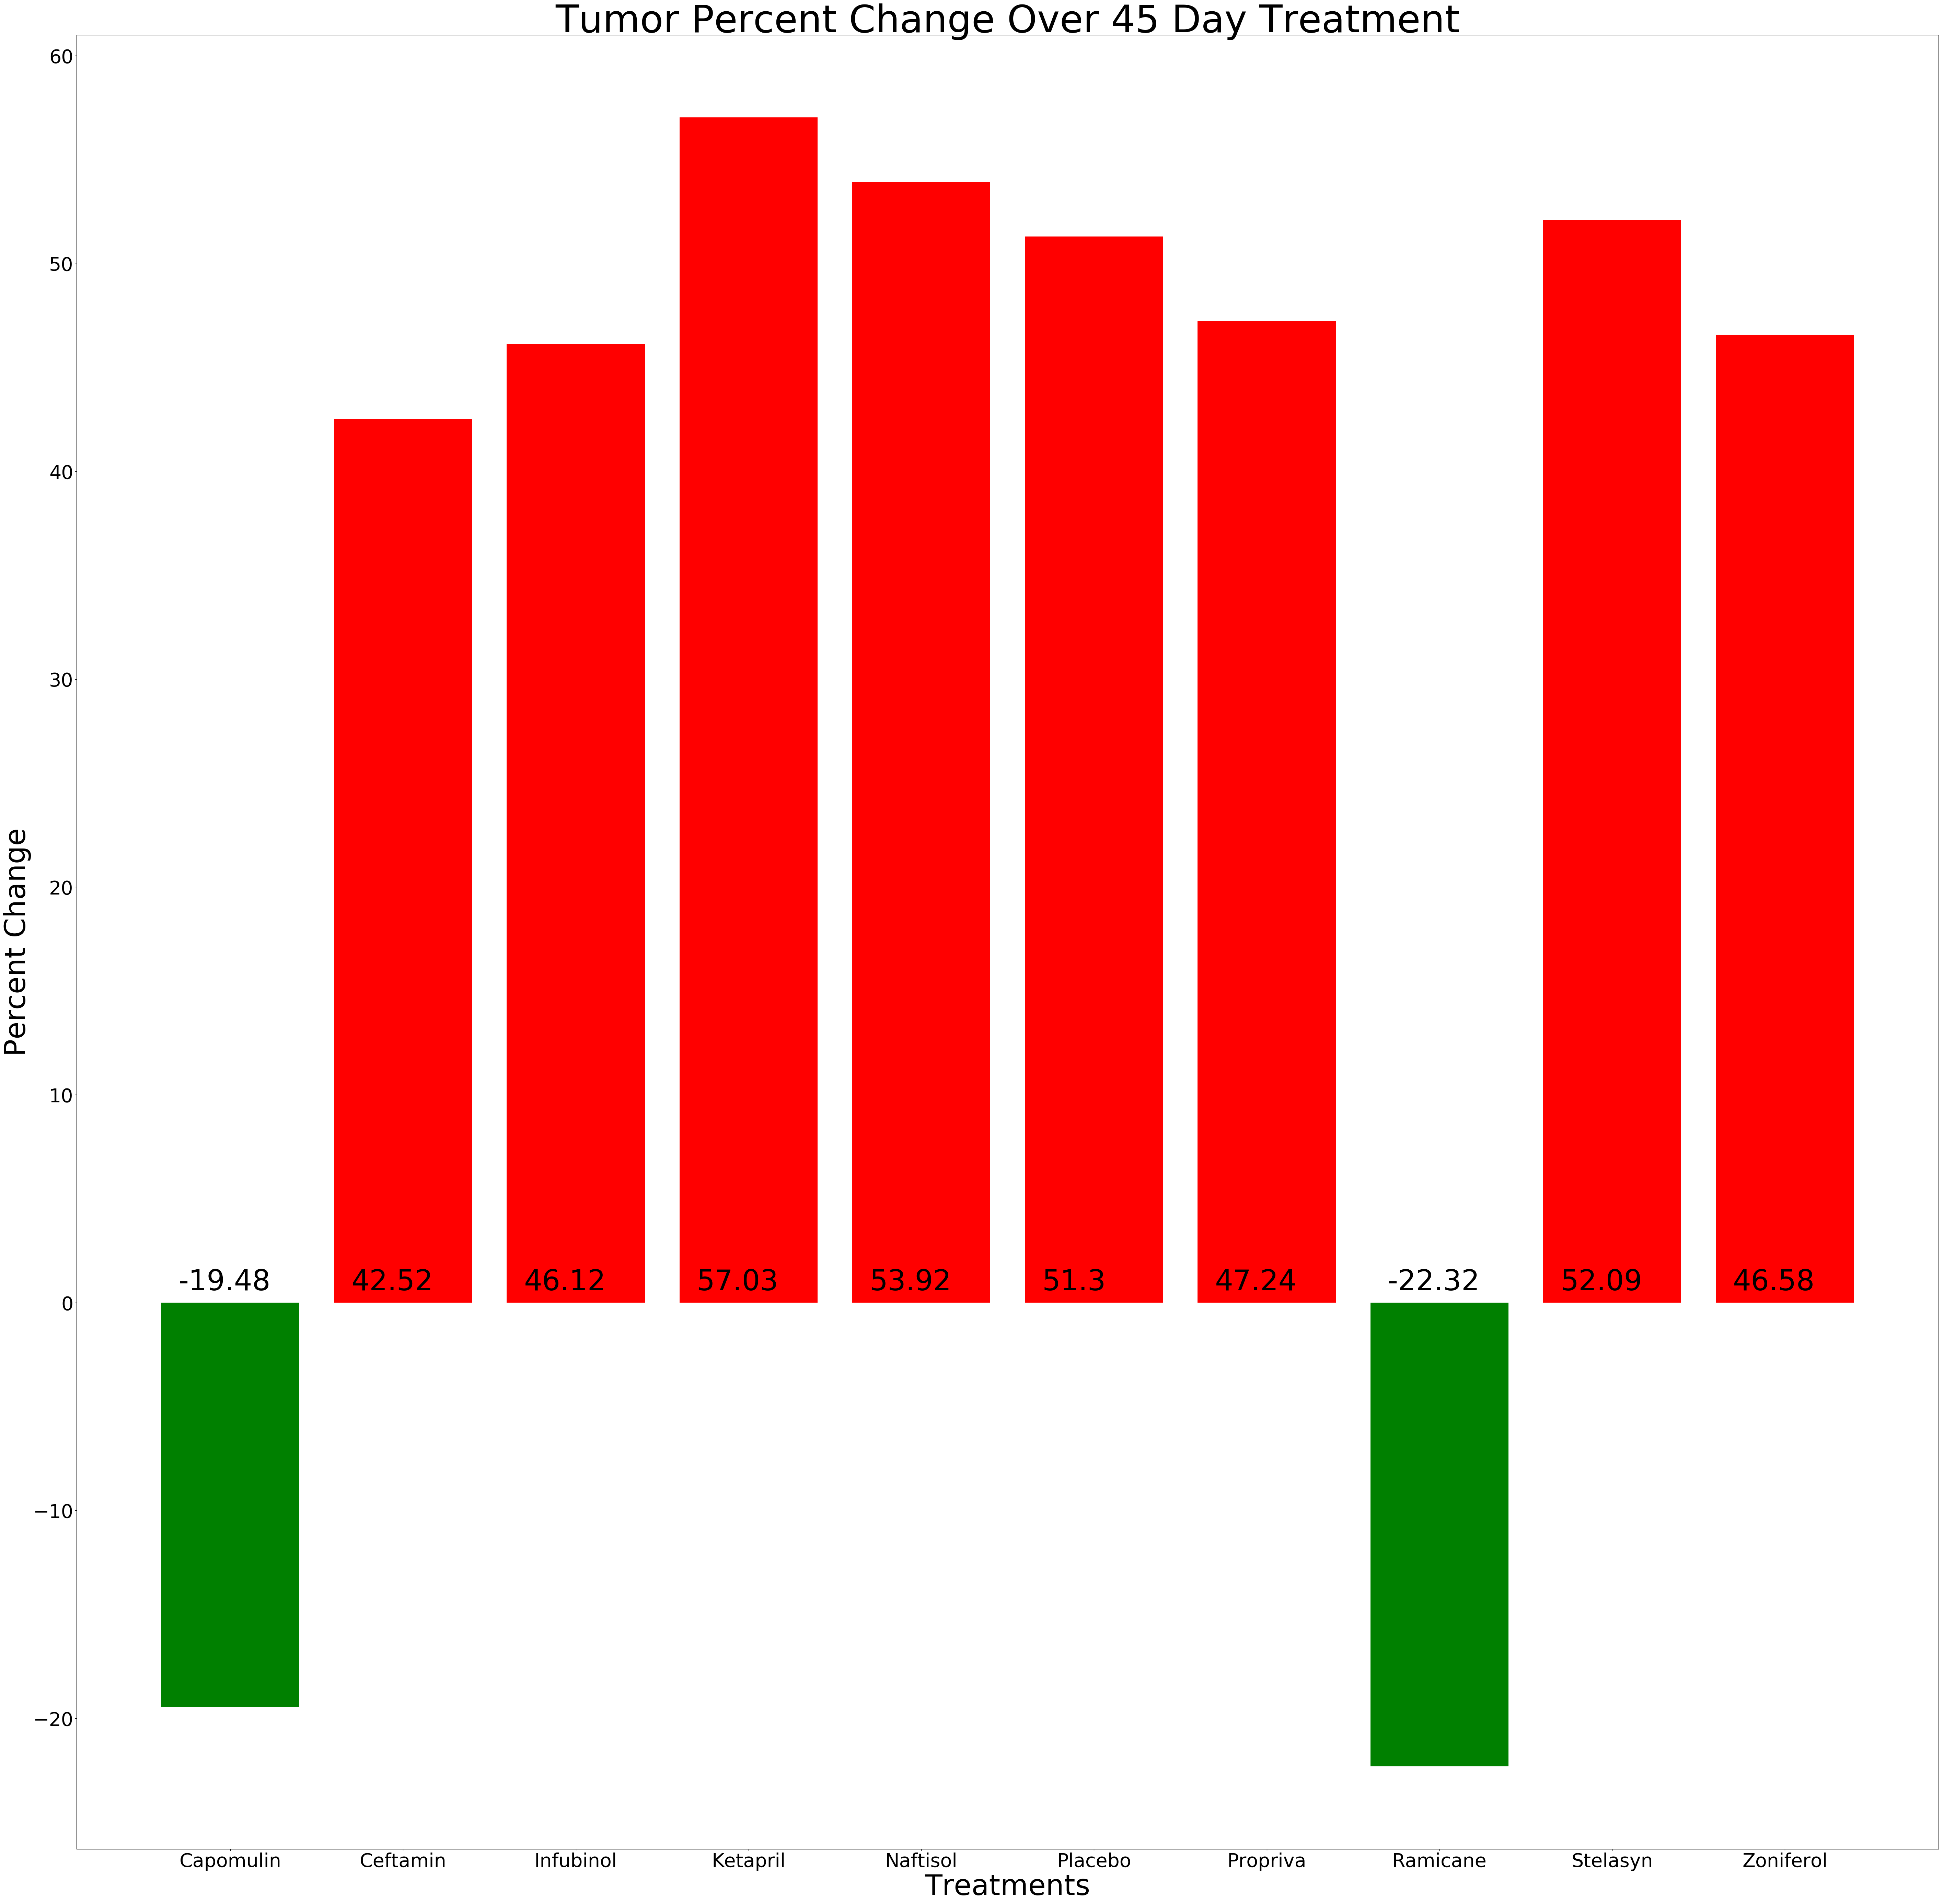

In [26]:
plt.figure(4,figsize=(70,70), dpi = 100)
loc = range(len(all_percents))
print(loc)
labels = ("Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", 
          "Ramicane", "Stelasyn", "Zoniferol")
plt.xticks(loc, labels, size=40)
plt.yticks(size=40)
x_axis = np.arange(len(all_percents))
plt.title("Tumor Percent Change Over 45 Day Treatment", size=80)
plt.xlabel("Treatments", size=60)
plt.ylabel("Percent Change", size=60)
# Counter define here for x
for i, percent in enumerate(all_percents):    
    plt.text(s=round(percent,2), x=i-0.3, y=1, color="black", verticalalignment="center", size=60)
plt.bar(x_axis, all_percents, color = bar_color)
plt.show()

# plt.ylim(-(max(all_percents)), max(all_percents))

In [ ]:
# percent_change = [tumor_per_change["Capomulin"], 
#                   tumor_per_change["Infubinol"], 
#                   tumor_per_change["Ketapril"], 
#                   tumor_per_change["Placebo"]]
# ]
# percent_change_sem = [tumor_change_sem_cap]